In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1D

In [2]:
Nx = 100
Nt = 10000
x = np.linspace(-5,5,Nx)
t = np.linspace(0,100,Nt)
extent = [np.min(x),np.max(x),np.min(t),np.max(t)]
dx = x[1] - x[0]
dt = t[1] - t[0]
c = 1
C = c* dt/dx

sol = np.zeros( shape = (Nt,Nx) , dtype = np.double)

#sol[0] = np.zeros(Nx)
sol[0] = 5*np.exp(-x**2)
sol[1] = np.copy(sol[0])

source = np.zeros( shape=(Nt,Nx))
#source[:,int(Nx/2)] = 0.5*np.sin(0.5*np.pi *t)
print(C)

0.0990099009900988


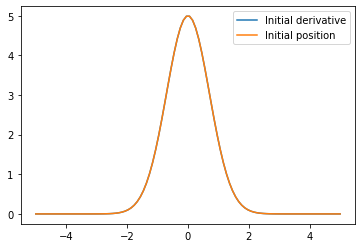

In [3]:
plt.plot(x,sol[0], label = "Initial derivative")
plt.plot(x,sol[1], label = "Initial position")
plt.legend()
plt.show()

In [4]:
for i in range(1,Nt-1):
    sol[i+1,1:-1] = sol[i,2:] + sol[i,:-2] - sol[i-1,1:-1] + source[i,1:-1]
    sol[i+1,-1] = sol[i,-2]
    

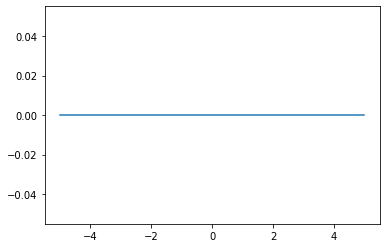

In [5]:
plt.plot(x,sol[-1])
plt.show()

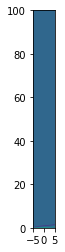

In [6]:
plt.imshow(sol,origin="lower",extent = extent)

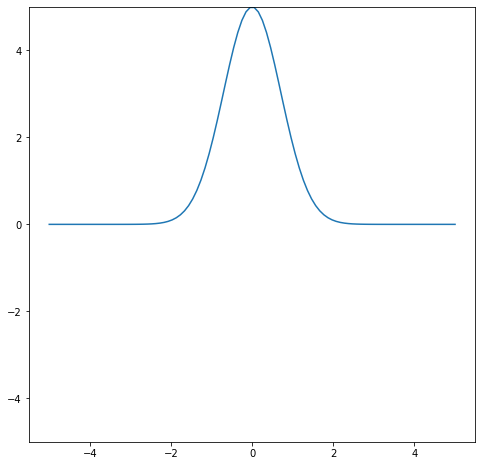

In [7]:
#%matplotlib notebook
import matplotlib.animation as animation

fps = 30
nSeconds = 30


# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure( figsize=(8,8) )

a = sol[0]
im, = plt.plot(x,a)
plt.ylim(-5,5)

def animate_func(i):
    if i % fps == 0:
        print( '.', end ='' )

    im.set_data(x,sol[i])
    return [im]

anim = animation.FuncAnimation(fig,animate_func,frames = nSeconds * fps, interval = 1000 / fps)
#anim.save('1Dwave_openright.mp4', fps=fps, extra_args=['-vcodec', 'libx264'])
plt.show()

# 2D

In [127]:
Nx = 100
Ny = 100
Nt = 1000
x = np.linspace(-5,5,Nx)
y = np.linspace(-5,5,Ny)
t = np.linspace(0,10,Nt)
extent2 = [np.min(x),np.max(x),np.min(y),np.max(y)]
dx = x[1] - x[0]
dy = y[1] - y[0]
dt = t[1] - t[0]

c = 1
Cx = c * dt/dx
Cy = c * dt/dy

X,Y = np.meshgrid(x,y)
wall = np.zeros( shape = (Nx,Ny), dtype = bool)
wall[30,:48] = 1
wall[30,53:] = 1
sol = np.zeros( shape = (Nt,Nx,Ny) , dtype = np.double)
sol[0] = np.zeros( shape = (Nx,Ny))
#sol[0] = 5*np.exp(-5*(X**2 + Y**2))
sol[1] = np.copy(sol[0])
temp = np.zeros( shape = (Nx,Ny), dtype = np.double)
#sol[0] = np.exp(-x**2)
#sol[1] = np.exp(-x**2)
source = np.zeros( shape = (Nt,Nx,Ny))
source[:,1,:] = np.sin(2*np.pi*2*t)[:,None] 
#source[:,50,50] = np.sin(2*np.pi*3*t)
#source[:,int(Nx/2)] = 0.5*np.sin(0.5*np.pi *t)
print(Cx,Cy) # In the explicit scheme, for stable solution we need C <= 1

0.1991991991991992 0.1991991991991992


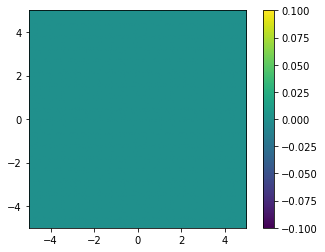

In [128]:
plt.imshow(sol[0],origin = 'lower', extent = extent2)
plt.colorbar()
plt.show()

In [129]:
for i in range(1,Nt-1):
    temp[1:-1,1:-1] =   Cx**2 *(sol[i,2:,1:-1] + sol[i,:-2,1:-1]) + Cy**2 * (sol[i,1:-1,2:] + sol[i,1:-1,:-2])  + 2*sol[i,1:-1,1:-1]*(1 - Cx**2 - Cy**2) - sol[i-1,1:-1,1:-1] + source[i,1:-1,1:-1] 
    temp[1:-1,-1] = Cx * sol[i,1:-1,-2] + sol[i,1:-1,-1] * (1 - Cx) # 1st order aproximation of one way wave equation
    temp[1:-1,0] =  Cx * sol[i,1:-1,1] + sol[i,1:-1,0] * (1 - Cx) # Has small reflections
    temp[-1,1:-1] = Cx * sol[i,-2,1:-1] + sol[i,-1,1:-1] * (1 - Cx)
    temp[0,1:-1] =  Cx * sol[i,1,1:-1] + sol[i,0,1:-1] * (1 - Cx)
    temp[wall] = 0
    sol[i+1] = temp[::]

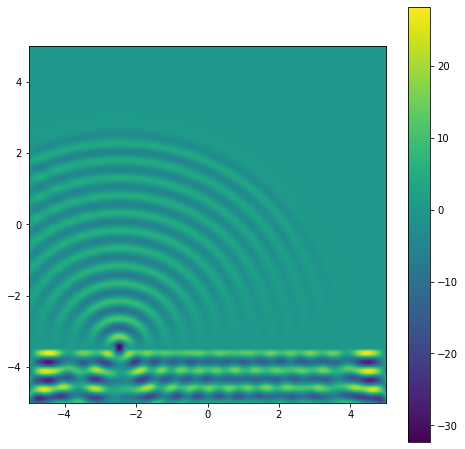

In [130]:
fig = plt.figure( figsize=(8,8) )
plt.imshow(sol[800], origin = 'lower', extent = extent2)#, vmin = -20, vmax = 20)
#plt.contourf(x,y,sol[-1])
plt.colorbar()
plt.show()

................................

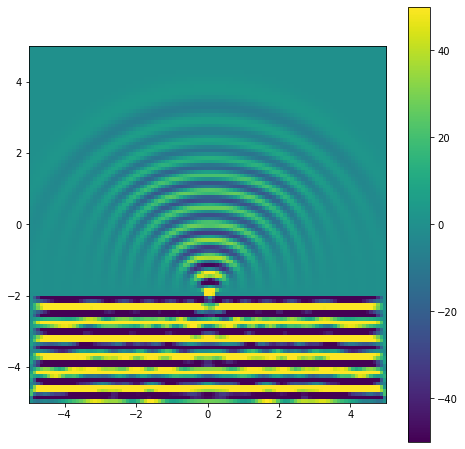

In [126]:
#%matplotlib notebook
import matplotlib.animation as animation

fps = 30
nSeconds = 30


fig = plt.figure( figsize=(8,8) )
#ax = plt.axes(xlim=(np.min(x), np.max(x)), ylim=(np.min(y), np.max(y)))

#wave = ax.contour(x,y,sol[0])
wave = plt.imshow(sol[0], origin = 'lower', extent = extent2, vmin = -50, vmax = 50)
plt.colorbar()

def animate_func(i):
    if i % fps == 0:
        print( '.', end ='' )
    #wave = ax.contour(x,y,sol[i])
    wave.set_array(sol[i])
    return [wave]

anim = animation.FuncAnimation(fig,animate_func,frames = nSeconds * fps, interval = 1000 / fps,blit = True)
anim.save('2DwaveNonreflectingDifractionfast.mp4', fps=fps, extra_args=['-vcodec', 'libx264'])
#plt.show()